In [1]:
from datetime import datetime, timedelta, date
from itertools import product, chain
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb

import numpy as np
import pandas as pd
from constants import *
from pandas_tools import multi_index_add as add
from animated_vaccinations import *
from vaccination import *
import colorsys
pd.set_option("display.max_rows", 999)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
vaccination_changes()

,,First Dose (Total),Second Dose (Total),First Dose (New),Second Dose (New)
,,,,,
England,26 Nov 21,"+42,723,293","+38,805,750","+19,098","+21,923"
Northern Ireland,26 Nov 21,"+1,362,366","+1,266,367",+0,+0
Scotland,26 Nov 21,"+4,344,043","+3,945,451",+835,"+1,226"
Wales,26 Nov 21,"+2,465,943","+2,260,662",+0,+0


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,38805750.0,42723293.0,3917543.0,56286961,68.9,7.0,24.1
1,Northern Ireland,N92000002,1266367.0,1362366.0,95999.0,1893667,66.9,5.1,28.1
2,Scotland,S92000003,3945451.0,4344043.0,398592.0,5463300,72.2,7.3,20.5
3,Wales,W92000004,2260662.0,2465943.0,205281.0,3152879,71.7,6.5,21.8


'partial: 50,895,645 (76.2%), full: 46,278,230'

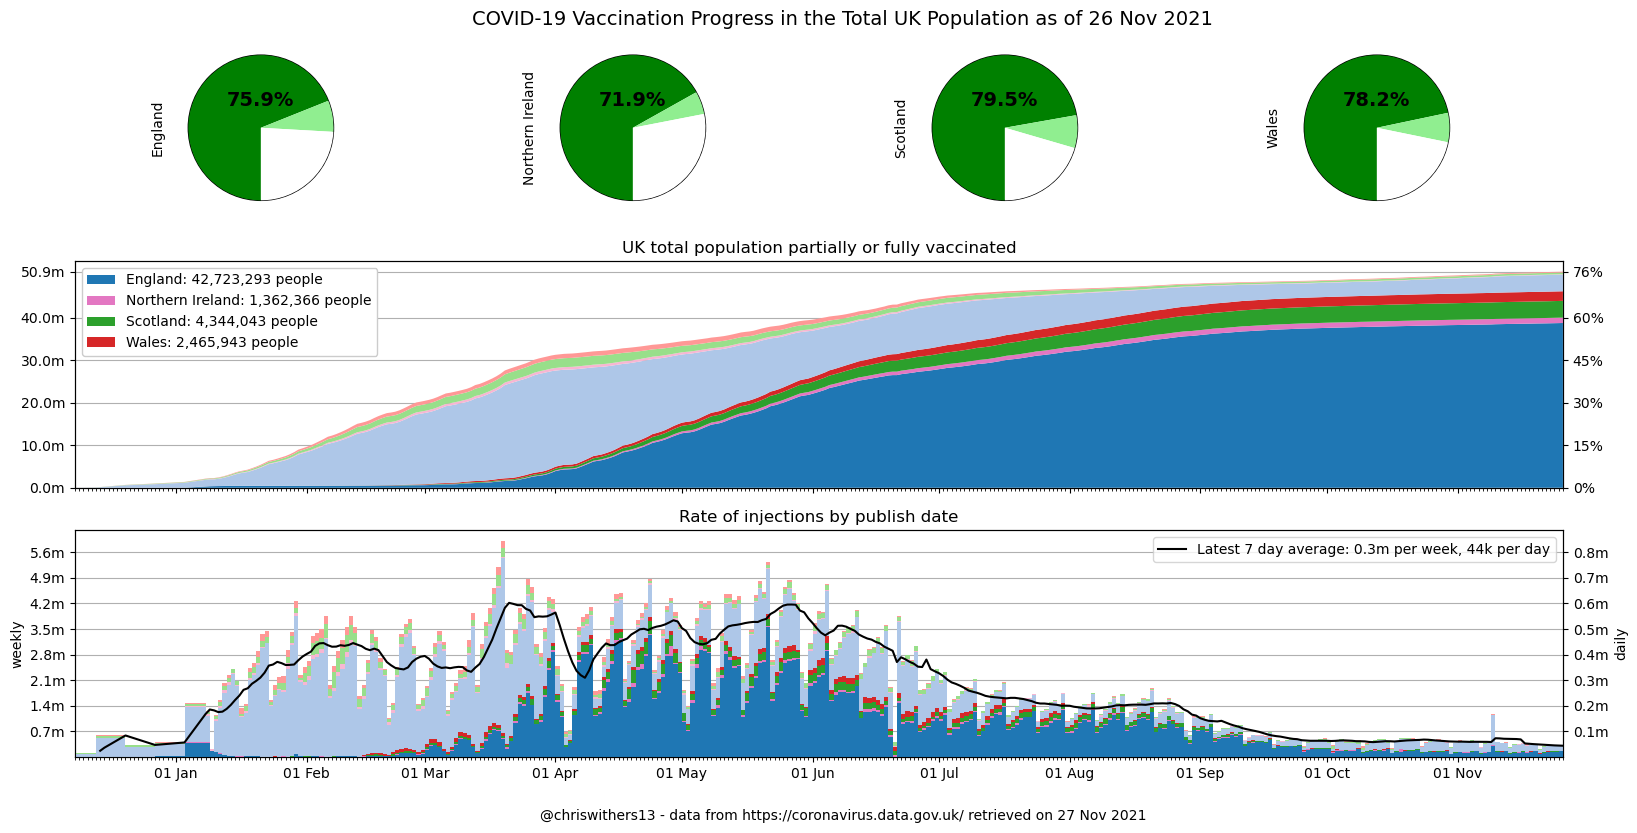

In [3]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [4]:
raw, data_date = raw_vaccination_data(sanity_checks=False)
not_complete = ~raw.columns.str.contains('Complete')
by_publish_metrics = raw.columns[raw.columns.str.contains('ByPublishDate') & not_complete]
by_vaccination_metrics = raw.columns[
    raw.columns.str.contains('ByVaccinationDate') & raw.columns.str.startswith('cum') & not_complete
]
metrics = by_publish_metrics.union(by_vaccination_metrics)

In [5]:
for dt in pd.date_range(earliest_vaccination, date.today()-timedelta(days=1)):
    changes = vaccination_changes(dt, exclude_okay=True)
    if changes:
        display(changes)

,,First Dose (New)
,,
Northern Ireland,16 Jan 21,"-20,172"


,,First Dose (New),Second Dose (New),Complete (New)
,,,,
Northern Ireland,06 Feb 21,+730,+272,+272


,,Second Dose (New),Complete (New)
,,,
Northern Ireland,21 Feb 21,-11,-11


,,First Dose (New),Second Dose (New),Complete (New)
,,,,
Scotland,19 Mar 21,"+25,255","+4,244","+4,244"


,,First Dose (New),Second Dose (New),Complete (New)
,,,,
Wales,01 Apr 21,"+16,995","+10,239","+10,239"


,,First Dose (New),Second Dose (New),Complete (New)
,,,,
Wales,03 Apr 21,"+10,558","+2,673","+2,673"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,16 Apr 21,"+14,243","+16,251","+14,243","+14,243","+16,251","+14,243"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,23 Apr 21,"+16,876","+15,833","+16,876","+16,876","+15,833","+16,876"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Scotland,24 Apr 21,"+49,206","+6,552","+49,206","+49,206","+6,552","+49,206"


,,First Dose (New)
,,
Northern Ireland,29 Apr 21,"-8,792"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Northern Ireland,21 Feb 21,+0,+0,+0,+11,+0,+0
Wales,30 Apr 21,"+16,329","+15,932","+16,329","+16,329","+15,932","+16,329"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,07 May 21,"+16,106","+13,661","+16,106","+16,106","+13,661","+16,106"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,14 May 21,"+14,291","+15,156","+14,291","+14,291","+15,156","+14,291"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,21 May 21,"+14,969","+11,347","+14,969","+14,969","+11,347","+14,969"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,28 May 21,"+21,587","+7,296","+21,587","+21,587","+7,296","+21,587"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,30 May 21,"+2,040","+4,644","+2,040","+2,040","+4,644","+2,040"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,04 Jun 21,"+27,340","+5,389","+27,340","+27,340","+5,389","+27,340"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,11 Jun 21,"+21,679","+5,685","+21,679","+21,679","+5,685","+21,679"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,18 Jun 21,"+16,819","+4,504","+16,819","+16,819","+4,504","+16,819"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,25 Jun 21,"+16,463","+2,114","+16,463","+16,463","+2,114","+16,463"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,02 Jul 21,"+16,715","+1,228","+16,715","+16,715","+1,228","+16,715"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,09 Jul 21,"+11,936","+1,408","+11,936","+11,936","+1,408","+11,936"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,16 Jul 21,"+13,338","+1,535","+13,338","+13,338","+1,535","+13,338"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,22 Jul 21,"+13,555","+1,036","+13,555","+13,555","+1,036","+13,555"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,30 Jul 21,"+6,980",+989,"+6,980","+6,980",+989,"+6,980"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,06 Aug 21,"+5,529","+1,311","+5,529","+5,529","+1,311","+5,529"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,13 Aug 21,"+4,633","+1,443","+4,633","+4,633","+1,443","+4,633"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,31 Aug 21,"+1,965","+1,303","+1,965","+1,965","+1,303","+1,965"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Scotland,15 Sep 21,"+4,300","+1,887","+4,300","+4,300","+1,887","+4,300"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,23 Sep 21,"+4,268","-32,861","+4,268","+4,268","-6,936","+4,268"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,26 Sep 21,"+2,247","+4,273","+2,247","+2,247","+4,273","+2,247"


FileNotFoundError: vaccination_2021-10-01.csv

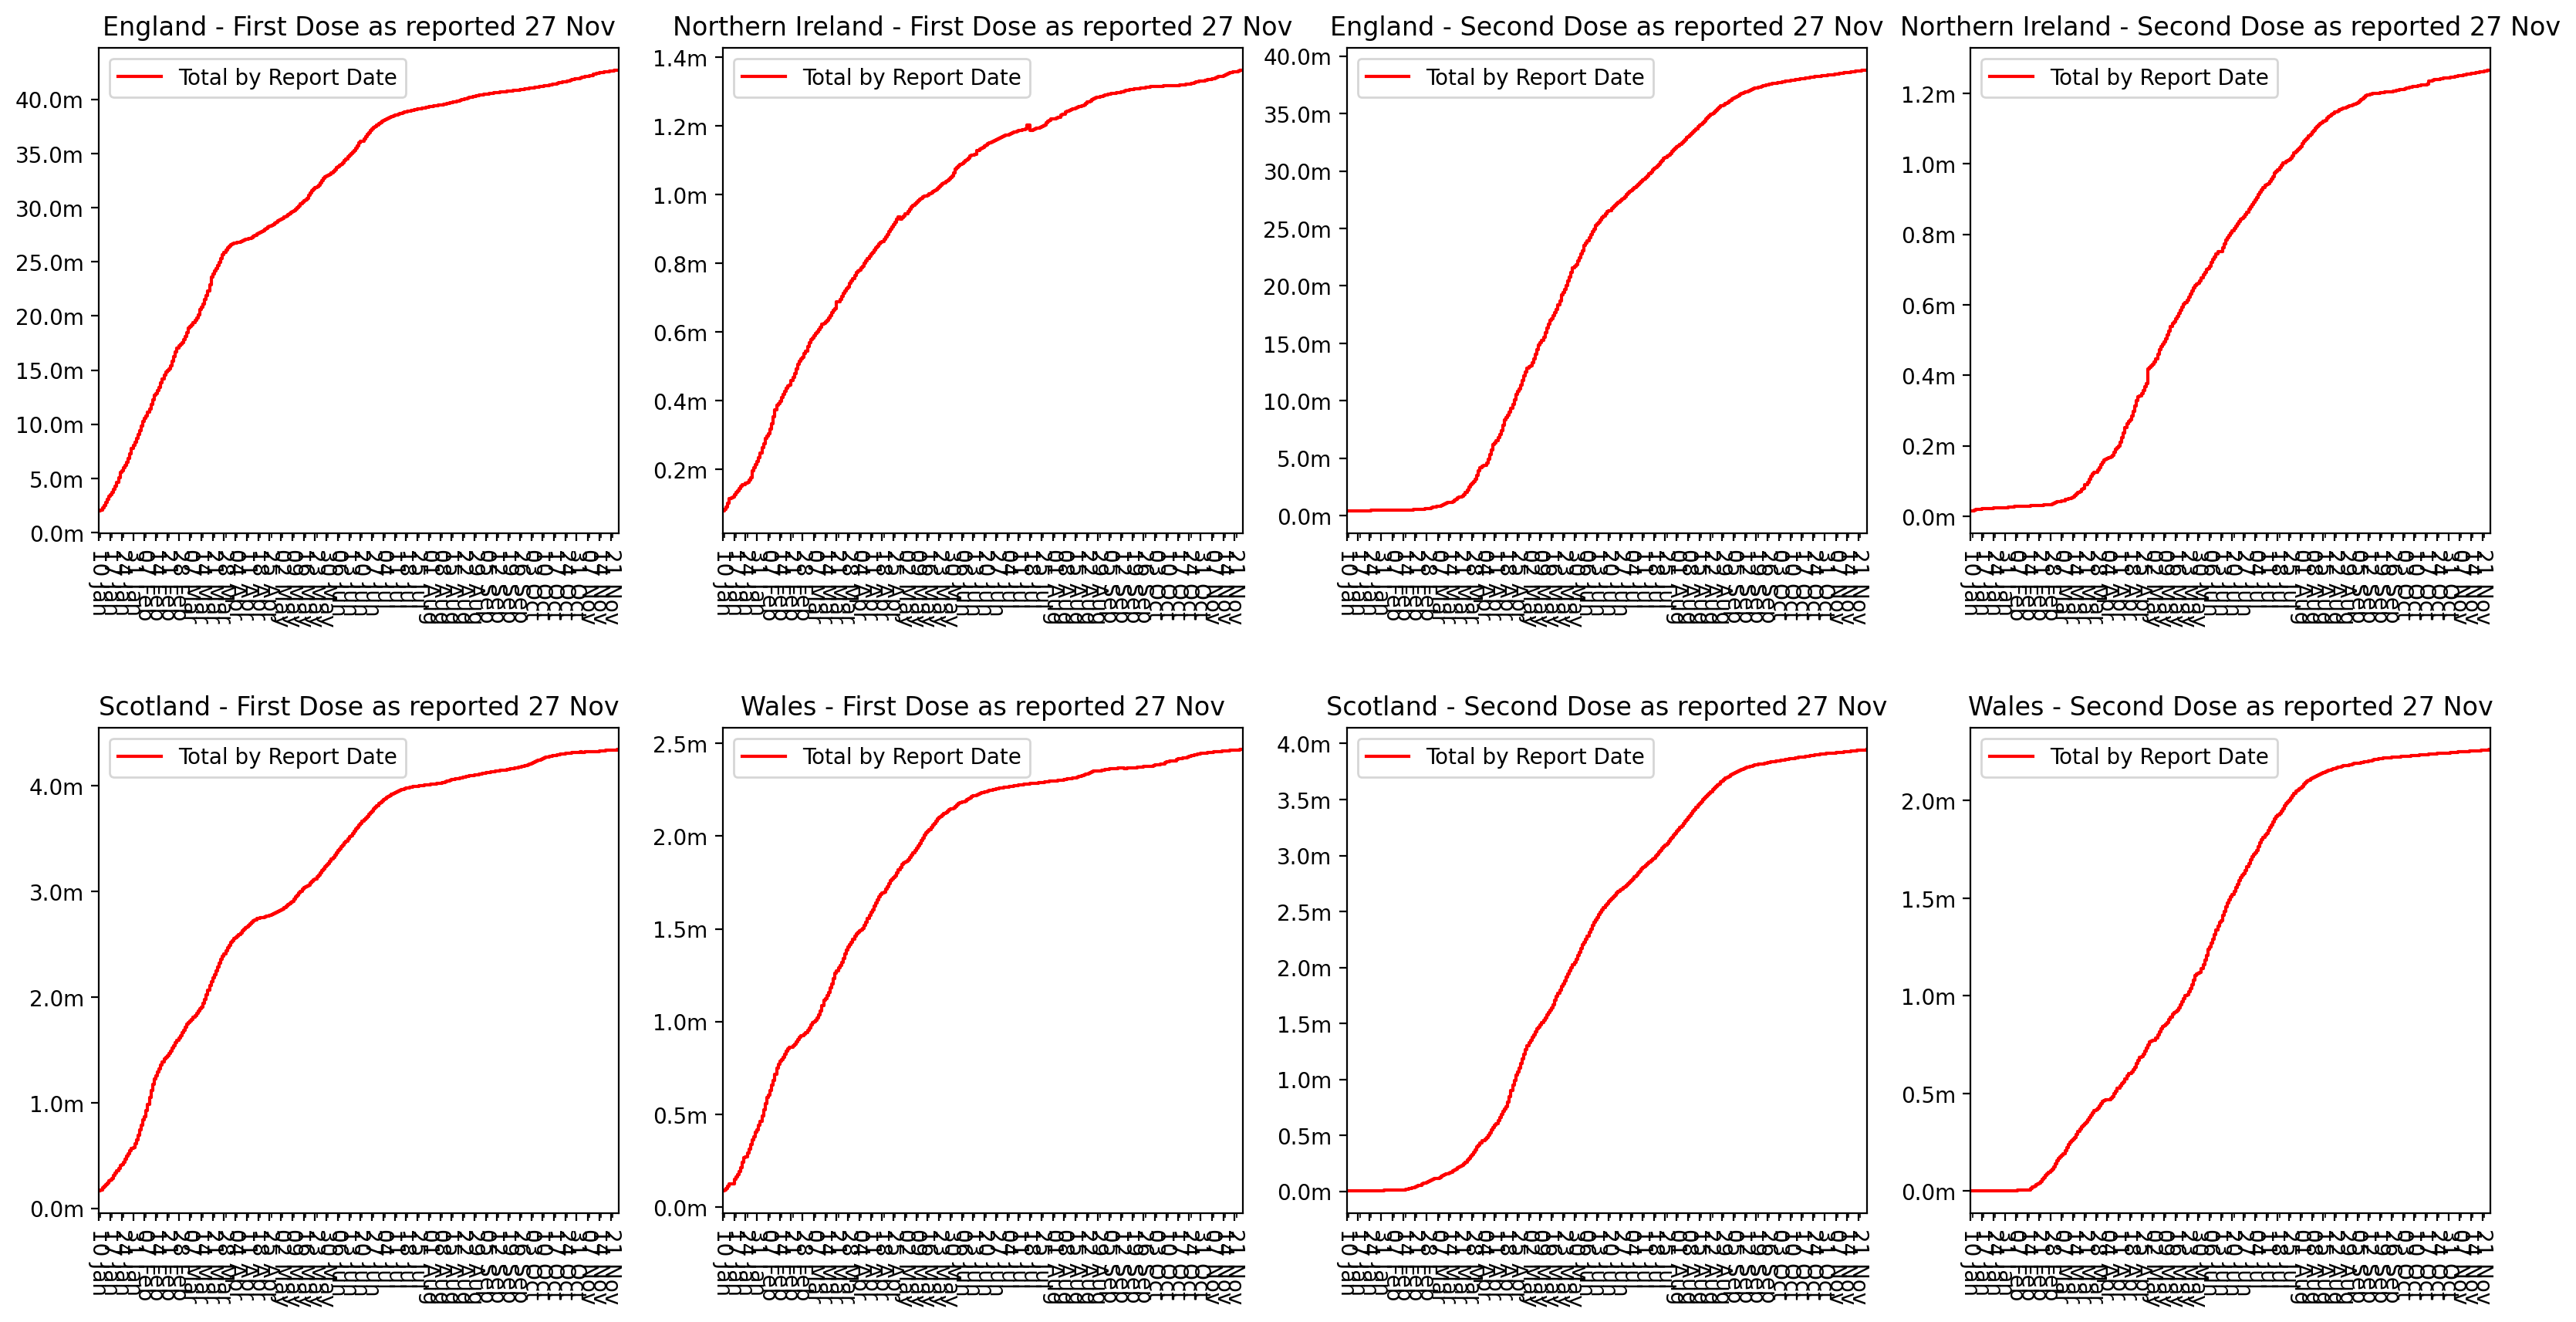

In [6]:
render_plots(selection_mapping()['everything'])